## Обработка данных и инфографика

В этой лекции мы продолжим тему обработки данных и их визуализации, познакомимся с библиотекой Pandas для работы с табличными данными и посмотрим на пару практических примеров.

Для начала, импортируем библиотеки:

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Прогнозирование развития эпидемии

Для начала вспомним про работу с матрицами numpy. Рассмотрим пример. Предположим, мы хотим спрогнозировать развитие эпидемии в двух городах разного размера (условно - Москва и Тула) в течение года. Для хранения данных о количестве заболевших можем использовать матрицу размером 2x365.

Зададим количество заболевших в первый день в явном виде (`inf[:,0]` ссылается на данные первого дня в обоих городах, поэтому мы присваиваем сразу пару чисел):

In [84]:
inf = np.zeros((2,365))
inf[:,0] = [5,2]
inf

array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

Предположим, что в Москве 1 человек за день инфицирует в среднем 1.2 человека, а в Туле - 1.1 человека. Зададим эти данные в виде массива из двух коэффициентов `inf_rate`.

Чтобы вычислить количество зараженных во второй день, надо умножить количество в первый день на коэффициенты. Это можно сделать одной операцией `*`, которая может сразу работать над двумя числами.

Расчитаем количество заболевших для всего года:

In [87]:
inf_rate = np.array([1.2,1.1])
for i in range(1,365):
  inf[:,i] = inf[:,i-1]*inf_rate

Построим график.

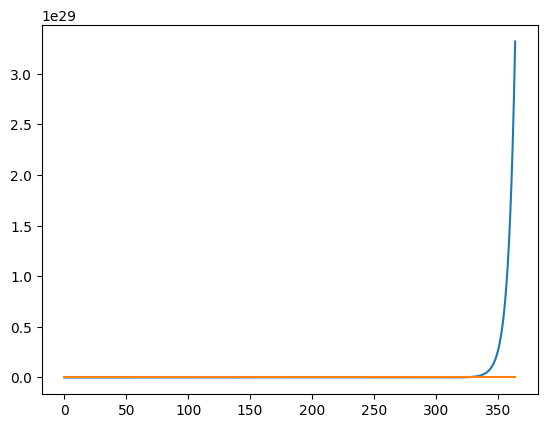

In [86]:
plt.plot(inf[0])
plt.plot(inf[1])

График получился экспоненциальный, потом что такова природа заражения, если заболевшие не выздоравливают, не приобретают иммунитет, и если число людей не ограничено.

Давайте попробуем учесть, что через 20 дней люди выздоравливают, т.е. из заболевших в день n мы вычитаем количество заболевших в день n-20:

In [88]:
inf_rate = np.array([1.2,1.1])
for i in range(1,365):
  inf[:,i] = inf[:,i-1]*inf_rate
  if i>20:
    inf[:,i] = inf[:,i] - inf[:,i-20]

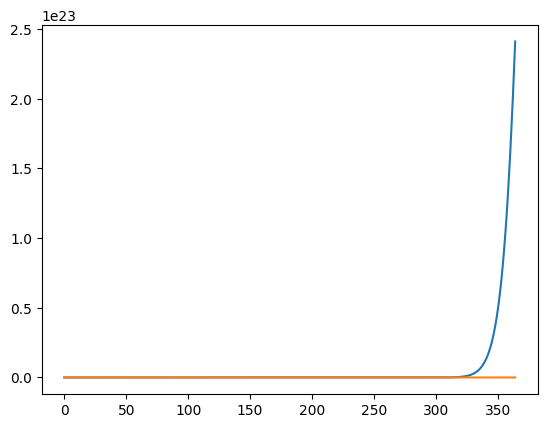

In [89]:
plt.plot(inf[0])
plt.plot(inf[1])

Видим, что развитие эпидемии не такое сильное, но все-таки большое.

Теперь добавим случайности: будем брать коэффициенты инфицированности случайным образом, с заданным средним значением `inf_rate_mean`, и с дисперсией (средним отклонением) `inf_rate_delta`. Функция `np.random.normal` поможет нам сгенерировать такое случайное значение.

In [90]:
inf_rate_mean = np.array([1.2,1.2])
inf_rate_delta = np.array([0.2,0.2])

for i in range(1,365):
  inf_rate = np.random.normal(inf_rate_mean,inf_rate_delta,size=2)
  inf[:,i] = inf[:,i-1]*inf_rate
  if i>20:
    inf[:,i] = inf[:,i] - inf[:,i-20]

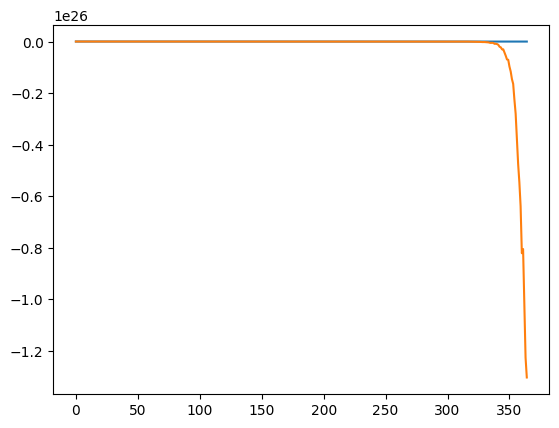

In [91]:
plt.plot(inf[0])
plt.plot(inf[1])

Если мы запустим несоколько раз, то увидим, что в зависимости от случайности, эпидемия может сойти "на нет", а также уйти в отрицательную зону.

Не будем сильно углубляться в моделирование эпидемий и исправлять это.

## Pandas

Перейдём к библиотеке Pandas для работы с таблицами. В этой библиотеке есть два основных понятия:

* Последовательность - это набор значений (как список) с некоторым **индексом**. При этом при операциях с последовательностями (сложение и т.д.) учитывается индекс элементов, и складываются элементы с равными индексами.

* Таблица или DataFrame - набор последовательностей с общим индексом.

Можем создать DataFrame, перечислив значения всех столбцов. При этом будет назначен индекс по умолчанию:

In [103]:
import pandas as pd

df = pd.DataFrame({
    "Name" : ["Vasya", "Petya", "Masha"],
    "Surname" : ["Ivanov", "Petrov", "Sidorova"],
    "Age" : [10,20,30]
})
df

,Name,Surname,Age
0,Vasya,Ivanov,10
1,Petya,Petrov,20
2,Masha,Sidorova,30


Для выборки одного столбца используется такая конструкция:

In [104]:
df["Name"]

0    Vasya
1    Petya
2    Masha
Name: Name, dtype: object

Можно выбрать несколько под-столбцов:

In [105]:
df[['Name','Surname']]

,Name,Surname
0,Vasya,Ivanov
1,Petya,Petrov
2,Masha,Sidorova


Можно добавить к таблице новый столбец:

In [106]:
df['Full Name'] = df['Name'] + ' ' + df['Surname']
df

,Name,Surname,Age,Full Name
0,Vasya,Ivanov,10,Vasya Ivanov
1,Petya,Petrov,20,Petya Petrov
2,Masha,Sidorova,30,Masha Sidorova


Функция `apply` позволяет совершить операцию над каждым элементов последовательности:

In [107]:
df['Age'].apply(lambda x : x+1)

0    11
1    21
2    31
Name: Age, dtype: int64

Например, увеличим возраст на год:

In [108]:
df['Age'] = df['Age'].apply(lambda x : x+1)
df

,Name,Surname,Age,Full Name
0,Vasya,Ivanov,11,Vasya Ivanov
1,Petya,Petrov,21,Petya Petrov
2,Masha,Sidorova,31,Masha Sidorova


## Эпидемия коронавируса

Возьмём данные о числе заболевших коронавирусом в разных странах, из [репозитория университета Джона Хопкинса](https://github.com/CSSEGISandData/COVID-19)

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


Мы можем выбрать только интересующие нас строки с помощью вот такого выражения:

In [28]:
df[df['Country/Region']=='Russia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
221,NaN,Russia,61.52401,105.318756,0,0,0,0,0,0,...,21960719,21974098,21988110,22002485,22016406,22029824,22040875,22051220,22063473,22075858


Чтобы получить последовательность заболевших только для России, используем конструкцию `iloc`, которая позволяет обращаться к элементам таблицы по номеру строки (и столбца, при необходимости):

In [37]:
inf = df[df['Country/Region']=='Russia'].iloc[0,4:]
inf

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
3/5/23     22029824
3/6/23     22040875
3/7/23     22051220
3/8/23     22063473
3/9/23     22075858
Name: 221, Length: 1143, dtype: object

Построим график числа заболевших:

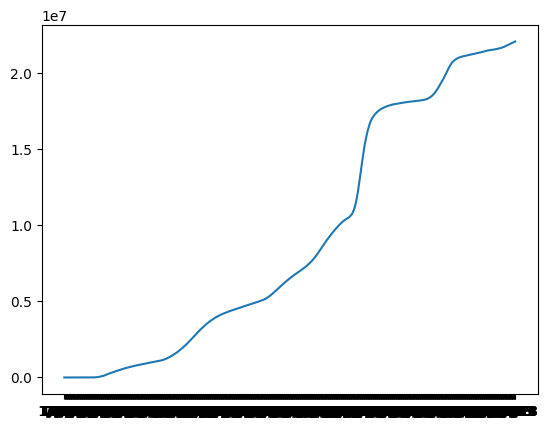

In [38]:
plt.plot(inf)

Для того, чтобы видеть интенсивность эпидемии, полезно посмотреть на ежедневный прирост заболевших. Вычислить прирост (разницу между текущим и предыдущим значением) можно с помощью функции `diff`:

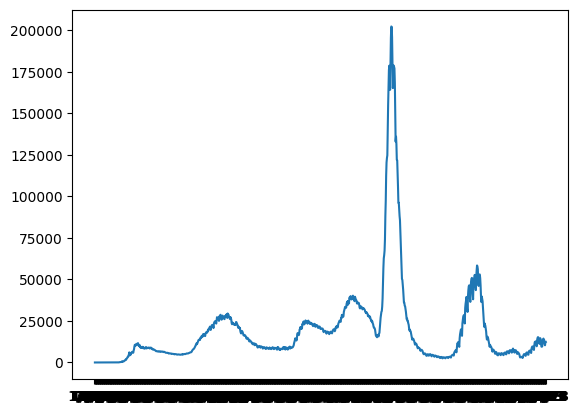

In [40]:
plt.plot(inf.diff())

Создадим DataFrame с число заболевших `Inf` и ежедневным приростом `Diff`:

In [42]:
df = pd.DataFrame( { "Inf" : inf, "Diff" : inf.diff() })
df.index = pd.to_datetime(df.index)
df

<ipython-input-42-c65fa9144737>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


,Inf,Diff
2020-01-22,0,NaN
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2023-03-05,22029824,13418
2023-03-06,22040875,11051
2023-03-07,22051220,10345
2023-03-08,22063473,12253


Теперь можно удобно строить разные графики прямо из DataFrame:

<Axes: >

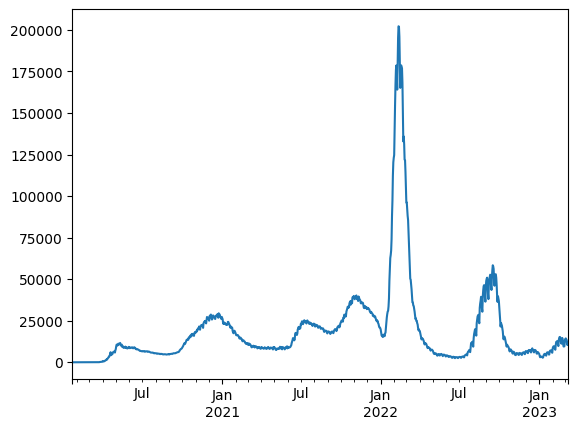

In [43]:
df['Diff'].plot()

> Обратите внимание, что раньше мы строили графики с помощью функций matplotlib (`plt.plot`, `plt.bar` и т.д.) В этом случае у нас больше выразительных возможностей, но нам нужно вручную заботиться о том, чтобы оси были красиво подписаны. В последней случае мы использовали функцию `plot` из библиотеки Pandas, и она сама позаботилась о красивой маркировке оси X в виде дат.

Посмотрим на начальный этап эпидемии более подробно. Для этого используем знакомый нам приём по выборке строк, для которых индекс (т.е. дата) меньше заданного значения.

<Axes: >

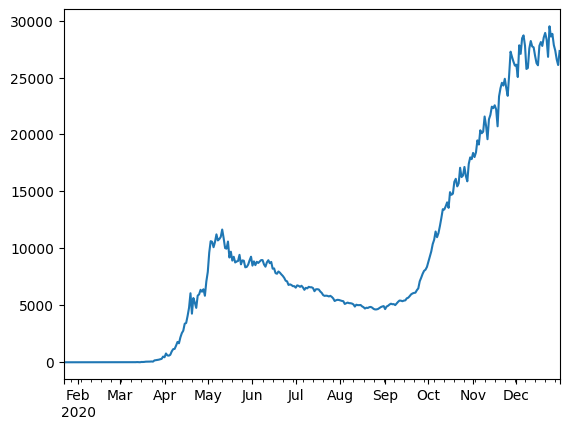

In [46]:
df[df.index<'2021-01-01']['Diff'].plot()

Мы видим периодические флуктуации значения в виде "пилы" на графике. Это вызвано недельными колебаниями, возникающими из-за неравномерности отчётов по больным в выходные. Чтобы получить более гладкий график, используем приём **скользящее среднее**:

* Проходимся по всем значениям **скользящим окном** длиной 7 элементов. Это делает функция `rolling`
* Усредняем все значения в этом окне с помощью `mean`

Получим новую колонку `DiffAv` со сглаженными значениями, и построим оба графика сразу:

<Axes: >

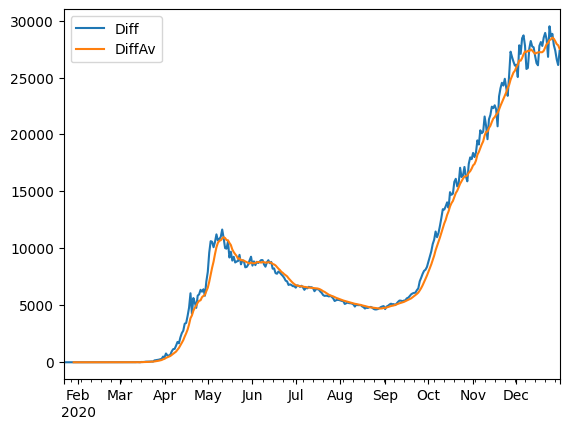

In [48]:
df['DiffAv'] = df['Diff'].rolling(7).mean()
df[df.index<'2021-01-01'][['Diff','DiffAv']].plot()

Для характеристики эпидемии используется значение `Rt`, показывающее, сколько людей в среднем заражает каждый человек. Такое значение можно оценить, поделив число заболевших в последующие 4 дня, и в предыдущие 4 дня.

> Мы попросили ChatGPT написать нам код для вычисления этого значения, используя вот такой запрос: *I have pandas dataframe with column 'Diff' and date index. How to calculate, for each day, the result of dividing sum 'Diff' value for the next 4 days (including current one), by the sum of 'Diff' value for the last 4 days?* Дальше мы выбрали из результата нужный фрагмент кода

<Axes: >

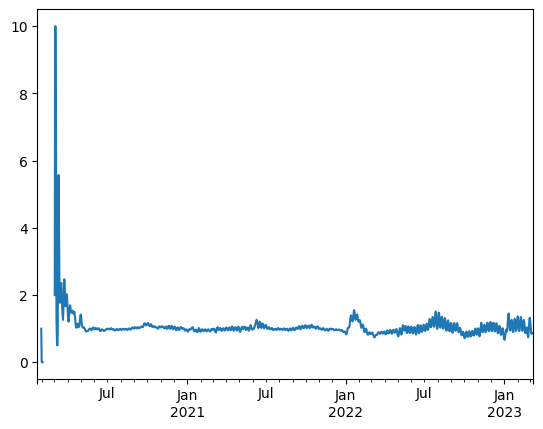

In [50]:
df['Future_4_day_sum'] = df['Diff'].rolling(window=4, min_periods=1).sum().shift(-3)
df['Past_4_day_sum'] = df['Diff'].rolling(window=4, min_periods=1).sum()

# Calculate the desired result
df['Result'] = df['Future_4_day_sum'] / df['Past_4_day_sum']
df['Result'].plot()


Чтобы сделать график красивее, мы попросили ChatGPT написать код для визуализации: *Please plot the value of the 'Result', but limit y values from 0 to 2, and plot horizontal line at y=1*.

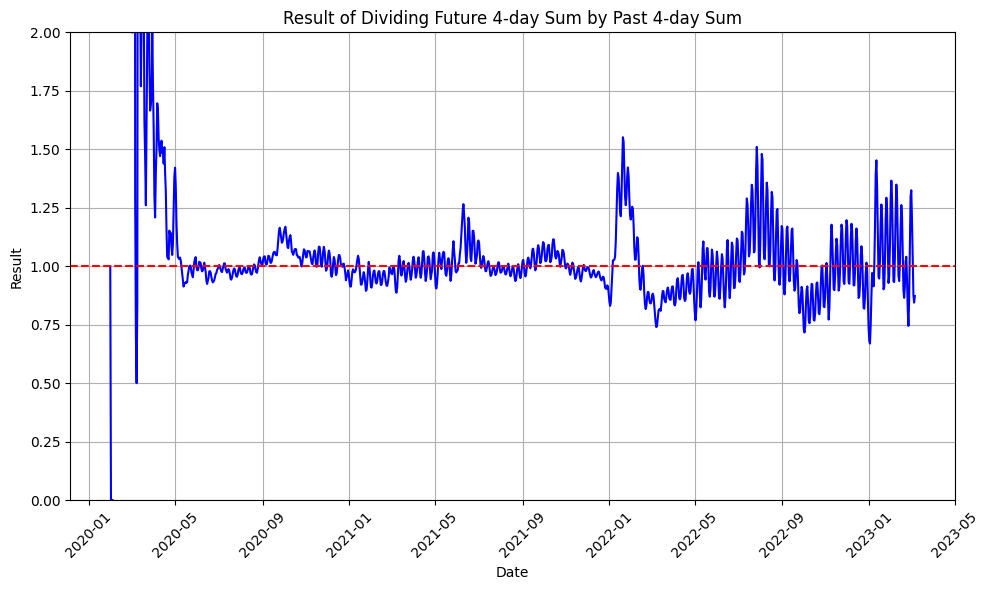

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Result'], linestyle='-', color='b')
plt.title('Result of Dividing Future 4-day Sum by Past 4-day Sum')
plt.xlabel('Date')
plt.ylabel('Result')
plt.ylim(0, 2)
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

Хороший способ получить красивую инфографику - это в диалоге с ChatGPT просить его улучшать график, пока не получится хороший результат. Если код ChatGPT вызывает ошибку - можно скопировать эту ошибку в диалог ChatGPT и попросить её исправить.

Второй хороший способ сделать красивую инфографику - это посмотреть на [примеры использования matplotlib](https://matplotlib.org/stable/plot_types/index.html) на сайте библиотеки. С каждым примером даётся пример кода, который можно пытаться адаптировать к своим данным и своим целям.

Ещё одна библиотека для красивых визуализаций с уклоном в статистику - это [Seaborn](https://seaborn.pydata.org/). На сайте также есть [набор примеров с кодом](https://seaborn.pydata.org/examples/index.html).

Наконец, можно использовать библиотеку [Plotly](https://plotly.com/python/) - ниже мы покажем один из примеров.

## Группировка

Очень полезная операция для анализа данных - построение **сводной таблицы**, или **группировка groupby**.

Предположим, у нас есть табличка с пользователями:

In [109]:
df = pd.DataFrame({
    "name" : ["Ivan","Andrew","Mark","Irina","Olga","Maria","Larisa"],
    "age" : [10,20,30,20,30,40,30],
    "gender" : ["male","male","male","female","female","female","female"]
})
df

,name,age,gender
0,Ivan,10,male
1,Andrew,20,male
2,Mark,30,male
3,Irina,20,female
4,Olga,30,female
5,Maria,40,female
6,Larisa,30,female


Мы хотим вычислить средний возраст отдельно для мужчин и для женщин. Это можно сделать так:

* группируем по полу (`.groupby('age')`)
* оставляем только поле возраст (`['Age']`)
* вычисляем среднее (`.mean()`)

In [110]:
df.groupby('gender')['age'].mean()

gender
female    30.0
male      20.0
Name: age, dtype: float64

Получилась последовательность. Чтобы было красивее, мы можем выбрать не одно поле `Age` (что приводит к выбору последовательности), а указать список полей `['Age']`, чтобы получить DataFrame:

In [111]:
df.groupby('gender')[['age']].mean()

,age
gender,
female,30.0
male,20.0


Обратите внимание, что если мы не сделаем выборку столбца Age, то получим ошибку, т.к. невозможно вычислить среднее по полю Name. Можем также заранее избавиться от поля Name, до группировки:

In [23]:
df[['gender','age']].groupby('gender').max()

,age
gender,
female,40
male,30


Обратите внимание, что в поле выше мы использовали функцию `max` для вычисления максимального возраста вместо среднего.

Мы также можем использовать более продвинутую функцию `agg` для вычисления любых аггрегатных функций от явно заданных столбцов:

In [112]:
df.groupby('gender').agg({ 'age' : 'mean' })

,age
gender,
female,30.0
male,20.0


Пользуясь этой функцией, мы можем посчитать также количество мужчин и женщин, используя `count` вместо `mean` с полем `name`. При этом для красоты мы также переименуем поле `name` в результирующей таблице в `count`:

In [26]:
df.groupby('gender').agg({ 'age' : 'mean', 'name' : 'count' }).rename(columns={ 'name' : 'count'})

,age,count
gender,,
female,30.0,4
male,20.0,3


Наконец, для каждого поля мы можем указать сразу несколько функций! Например, код ниже вычисляет сразу минимальный, средний и максимальный возраст, а также количество мужчин и женщин, и список из имён через запятую (за это отвечает функция `join`)

In [29]:
df.groupby('gender').agg({ 'age' : ['min','mean','max'], 'name' : [', '.join, 'count'] })

age                                  name      
       min  mean max                        join count
gender                                                
female  20  30.0  40  Irina, Olga, Maria, Larisa     4
male    10  20.0  30          Ivan, Andrew, Mark     3

## Titanic Dataset

Рассмотрим пример. Возьмём датасет пассажиров Титаника, и посмотрим, насколько реалистичен исход одноимённого фильма, в котором главная героиня выживает, а герой Ди Каприо - нет.

In [30]:
!wget http://www.soshnikov.com/permanent/data/titanic.zip

--2024-05-28 18:21:03--  http://www.soshnikov.com/permanent/data/titanic.zip
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29565 (29K) [application/zip]
Saving to: ‘titanic.zip’

titanic.zip         100%[===================>]  28.87K  70.6KB/s    in 0.4s    

2024-05-28 18:21:04 (70.6 KB/s) - ‘titanic.zip’ saved [29565/29565]



In [114]:
df = pd.read_csv('titanic.zip')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


В современной версии Google Colab мы можем нажать на **View recommended plots** под таблицей, чтобы автоматически сгенерировать код, подобный коду ниже:

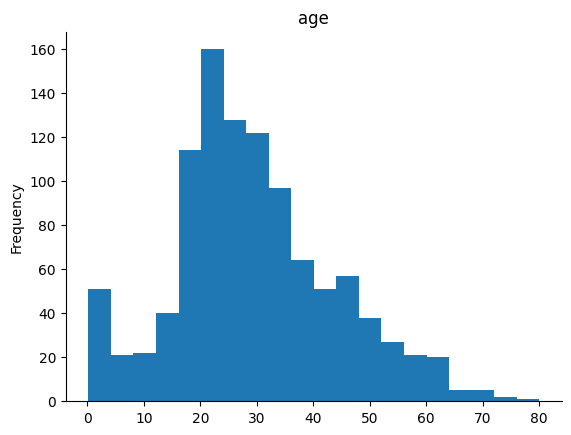

In [41]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Здесь мы построили т.н. **гистограмму** возрастов пассажиров, из которой видно, что максимальное число пассажиров приходится на возраст в районе 25 лет.

Теперь посчитаем вероятность выживания мужчин и женщин. Для этого используем группировку по полу, и вычисляем среднее от поля `survived`:

<Axes: xlabel='sex'>

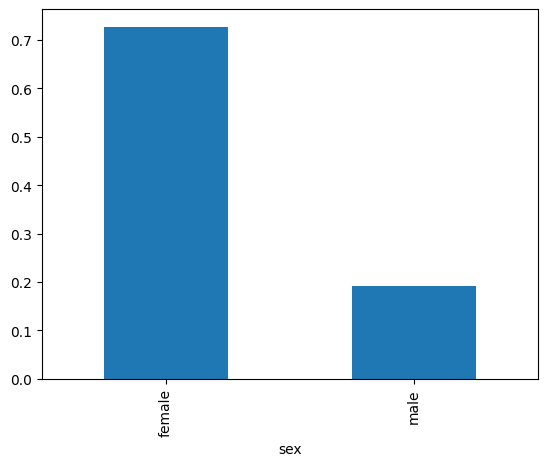

In [115]:
df.groupby('sex')['survived'].mean().plot.bar()

Можем показать вероятности с помощью круговых диаграмм (pie chart). Для этого попросим ChatGPT сгенерировать код с помощью запроса:

> *I have a dataframe with columns 'sex' ('male' or 'female') and 'survived' (0 or 1). I want to plot pie chart with probabilities of survival for males and females.*

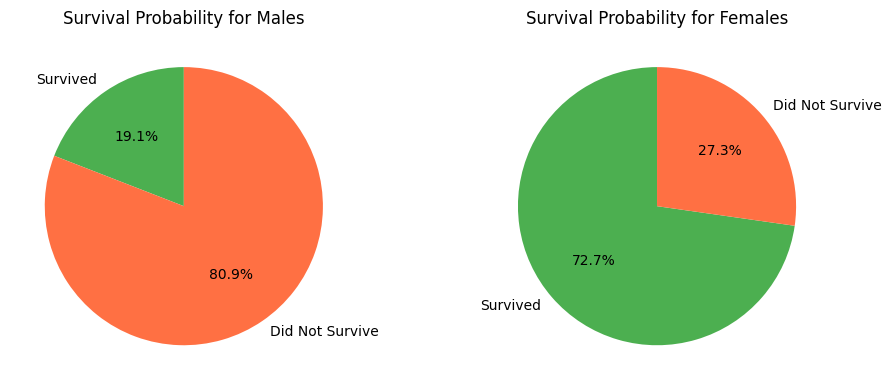

In [118]:
# Calculate survival probabilities
survival_prob = df.groupby('sex')['survived'].mean()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart for male survival probability
ax[0].pie(
    [survival_prob['male'], 1 - survival_prob['male']],
    labels=['Survived', 'Did Not Survive'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FF7043']
)
ax[0].set_title('Survival Probability for Males')

# Pie chart for female survival probability
ax[1].pie(
    [survival_prob['female'], 1 - survival_prob['female']],
    labels=['Survived', 'Did Not Survive'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FF7043']
)
ax[1].set_title('Survival Probability for Females')

plt.tight_layout()
plt.show()

Теперь мы можем попросить ChatGPT учесть наличие столбца `pclass` и построить красивую сравнительную визуализацию для всех трех классов с учетом пола:

> *I also have information about class (1, 2, or 3) in the field 'pclass'. Please suggest a good way to plot inforgraphics that will show relative probability of survival or males and females in 1, 2 and 3 class.*

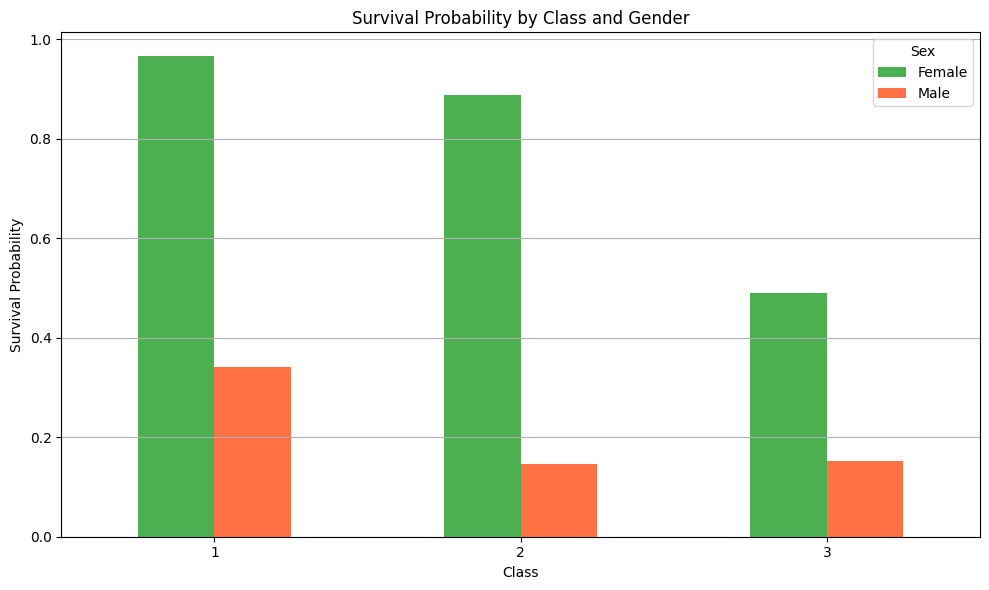

In [119]:
import seaborn as sns

# Calculate survival probabilities
survival_prob = df.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

# Pivot the table to get it in a format suitable for plotting
survival_prob_pivot = survival_prob.pivot(index='pclass', columns='sex', values='survived')

# Plotting
survival_prob_pivot.plot(kind='bar', figsize=(10, 6), color=['#4CAF50', '#FF7043'])

# Adding plot details
plt.title('Survival Probability by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Survival Probability')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

Обратите внимание, что здесь была использована библиотека Seaborn, поэтому при копировании нужного фрагмента кода нужно не забыть включить строку `import seaborn as sns`

Также обратите внимание, что здесь использовалась функция `groupby` сразу по двум параметрам: пол и класс. Так тоже можно, и это нам дальше пригодится!

Далее мы можем просто попросить ChatGPT:

> *can you make this plot more fancy?*

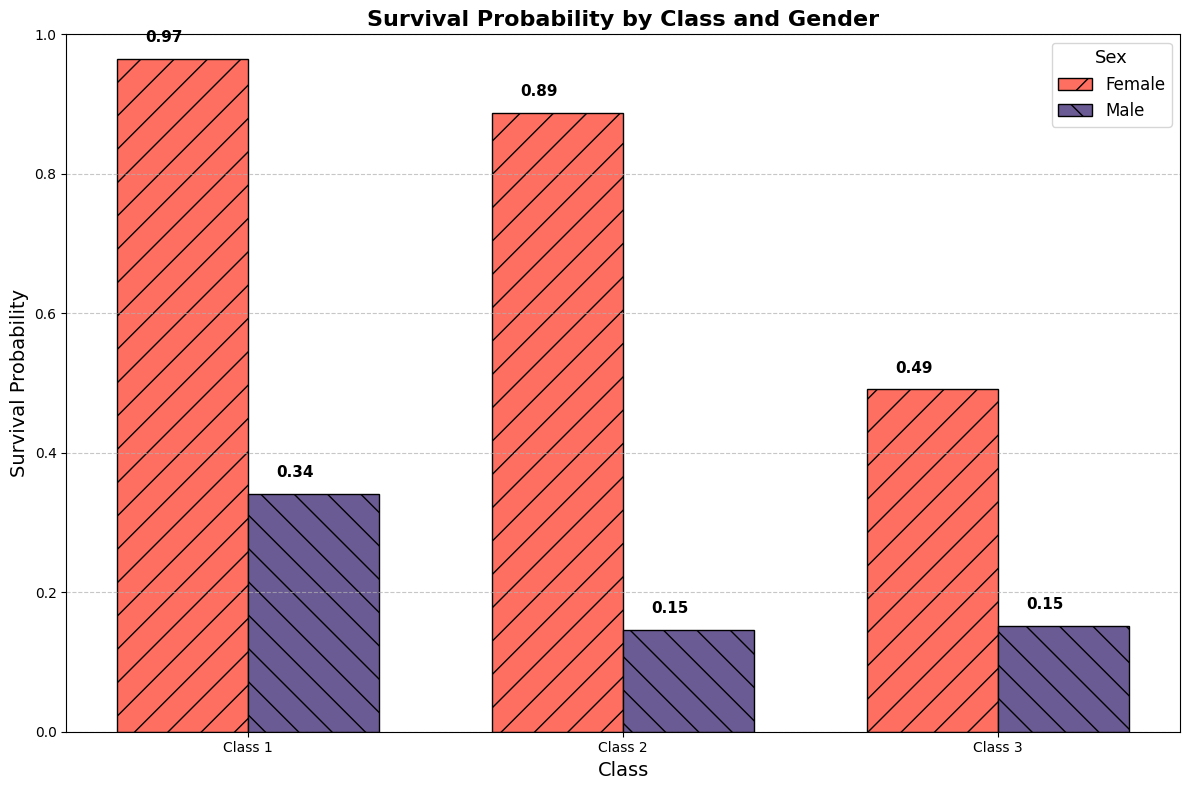

In [120]:
# Calculate survival probabilities
survival_prob = df.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

# Pivot the table to get it in a format suitable for plotting
survival_prob_pivot = survival_prob.pivot(index='pclass', columns='sex', values='survived')

# Set up the plot
plt.figure(figsize=(12, 8))
bar_width = 0.35

# Plot bars for females
bar1 = plt.bar(survival_prob_pivot.index - bar_width/2, survival_prob_pivot['female'],
               bar_width, label='Female', color='#FF6F61', edgecolor='black', hatch='/')

# Plot bars for males
bar2 = plt.bar(survival_prob_pivot.index + bar_width/2, survival_prob_pivot['male'],
               bar_width, label='Male', color='#6B5B95', edgecolor='black', hatch='\\')

# Adding title and labels
plt.title('Survival Probability by Class and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.xticks(survival_prob_pivot.index, ['Class 1', 'Class 2', 'Class 3'])
plt.ylim(0, 1)
plt.legend(title='Sex', title_fontsize='13', fontsize='12')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, yval + 0.02, round(yval, 2),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.05, yval + 0.02, round(yval, 2),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

## Исследуем статьи о коронавирусе

Рассмотрим ещё один содержательный пример.

В период пандемии коронавируса был собран гигантский датасет статей на эту тему: [CORD](https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge/data). Сейчас он насчитывает более миллиона статей, половина - с полным текстом. Мы попробуем проанализировать часть этого датасета, по абстрактам.

In [135]:
df = pd.read_csv("https://storage.yandexcloud.net/mypub/data/metadata.csv.zip",compression='zip')
df.head()

<ipython-input-135-a515b12040ad>:1: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.



,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


Нас будут интересовать основные поля в этом датасете: абстракт и время публикации:

In [136]:
df[['publish_time','abstract']]

,publish_time,abstract
0,2001-07-04,OBJECTIVE: This retrospective chart review des...
1,2000-08-15,Inflammatory diseases of the respiratory tract...
2,2000-08-25,Surfactant protein-D (SP-D) participates in th...
3,2001-02-22,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,2001-05-11,Respiratory syncytial virus (RSV) and pneumoni...
...,...,...
1056655,2020-02-02,"2019-nCoV, which is a novel coronavirus emerge..."
1056656,2013-10-28,Microbiology laboratories have traditionally r...
1056657,2020-07-02,To present a patient with bilateral conjunctiv...
1056658,2020-07-20,Given COVID-19 pandemic periodic outpatient as...


Обратите внимание - у нас в табличке более миллиона строк!

Для начала преобразуем `publish_time` в формат даты и посмотрим на гистограмму дат:

<Axes: >

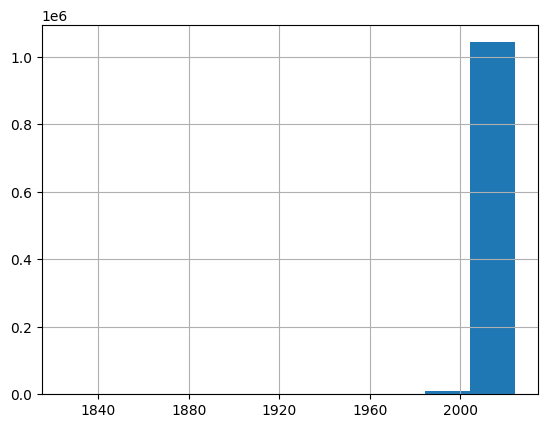

In [137]:
df['publish_time'] = pd.to_datetime(df['publish_time'],format='mixed')
df['publish_time'].hist()

Отфильтруем только записи между 2019 и 2022 годами. Обратите внимание, что вместо привычного оператора `and` мы используем `&` - это специальная операция, работающая с последовательностями значений `True`/`False`

<Axes: >

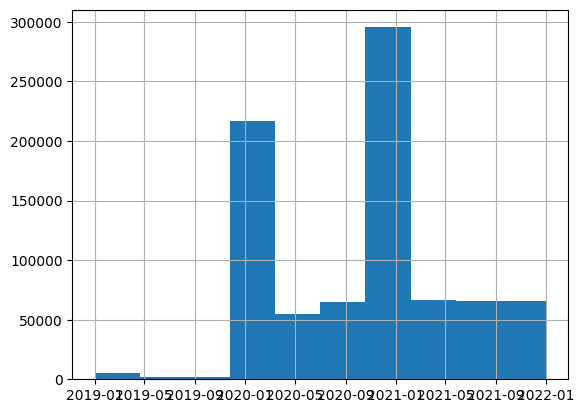

In [138]:
df = df[(df['publish_time']>='2019-01-01') & (df['publish_time']<'2022-01-01')]
df['publish_time'].hist()

Задача нашего исследования - посмотреть на то, какие лекарства чаще всего используются для лечения. Для этого:

* Определим списки лекарств и диагнозов
* Для каждого лекарства и диагноза добавим колонку в наш DataFrame, показывающую, сколько раз соответствующее лекарство или диагноз входит в абстракт

In [139]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin',
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
  print(f"Processing {m}")
  df[m] = df['abstract'].apply(lambda x: (' '+str(x)).lower().count(' '+m))

for m in diagnosis:
  print(f"Processing {m}")
  df[m] = df['abstract'].apply(lambda x: (' '+str(x)).lower().count(' '+m))

Processing hydroxychloroquine
Processing chloroquine
Processing tocilizumab
Processing remdesivir
Processing azithromycin
Processing lopinavir
Processing ritonavir
Processing dexamethasone
Processing heparin
Processing favipiravir
Processing methylprednisolone
Processing covid
Processing sars
Processing pneumonia
Processing infection
Processing diabetes
Processing coronavirus
Processing death


In [140]:
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,heparin,favipiravir,methylprednisolone,covid,sars,pneumonia,infection,diabetes,coronavirus,death
3552,qlwzl5mq,4c7f6c52fe043745887db5406196b1d5099c9614,PMC,Multiple Introductions of Domestic Cat Feline ...,10.3201/eid2501.181347,PMC6302599,30561312,no-cc,The endangered Florida panther (Puma concolor ...,2019-01-03,...,0,0,0,0,0,0,2,0,0,1
3571,eqgc8v7y,e5c06914d0daee6e881665b23adca340d0a6271a,PMC,Impact of glucose-6-phosphate dehydrogenase de...,10.1371/journal.pone.0209204,PMC6314580,30601843,cc-by,Glucose-6-phosphate dehydrogenase (G6PD) defic...,2019-01-02,...,0,0,0,0,0,0,2,0,0,0
3583,c22kw6f4,ae56d60debc175395e6269fc5bf9184291e71a56,PMC,Improvement in the survival rates of extracorp...,10.1186/s13054-018-2293-5,PMC6318967,30606235,cc-by,BACKGROUND: Although the utilization of extrac...,2019-01-03,...,0,0,0,0,0,0,0,0,0,0
3584,hbpk850a,ca8f30a35b564945dd2588c382a0e181a1e08662,PMC,Mental health workers perceptions of disaster ...,10.1186/s12889-018-6313-9,PMC6318987,30606149,cc-by,BACKGROUND: The post-disaster mental health cr...,2019-01-03,...,0,0,0,0,0,0,0,0,0,0
3588,7o47l32b,b797b4d3c0a5ecfdb0b08679c45648cad8f97795,PMC,Circular RNAs: a rising star in respiratory di...,10.1186/s12931-018-0962-1,PMC6321672,30611252,cc-by,"Circular RNAs (CircRNAs), as a new class of no...",2019-01-05,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056654,ttoodq5a,NaN,Elsevier; PMC; WHO,Chinese Herbal Medicine Telehealth Outcomes fo...,10.1016/j.eujim.2021.101904,PMC8696086,NaN,els-covid,Introduction: Given the seriousness of Coronav...,2021-12-31,...,0,0,0,7,0,0,0,0,1,0
1056655,aeuy92bx,d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...,BioRxiv; MedRxiv; WHO,Potent neutralization of 2019 novel coronaviru...,10.1101/2020.02.01.929976,NaN,NaN,medrxiv,"2019-nCoV, which is a novel coronavirus emerge...",2020-02-02,...,0,0,0,0,3,0,0,0,2,0
1056657,05dxn54t,0d1698212a1fcbbed2ffff38953397b3fb82f30d,Medline; PMC,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,PMC7446980,32794685.0,no-cc,To present a patient with bilateral conjunctiv...,2020-07-02,...,0,0,0,1,1,0,0,0,2,0
1056658,zpeij14g,9b2bbb5ceb21084931b5de7e0d60633e524a20bb,Medline; PMC,Incidental lowering of otitis-media complaints...,10.1007/s00431-020-03747-9,PMC7370867,32691131.0,no-cc,Given COVID-19 pandemic periodic outpatient as...,2020-07-20,...,0,0,0,1,0,0,1,0,0,0


Теперь посчитаем суммарное количество упоминаний по всем лекарствам. Чтобы оставить табличку только упоминаний, используем индексацию по списку:

In [141]:
df[medications]

,hydroxychloroquine,chloroquine,tocilizumab,remdesivir,azithromycin,lopinavir,ritonavir,dexamethasone,heparin,favipiravir,methylprednisolone
3552,0,0,0,0,0,0,0,0,0,0,0
3571,0,0,0,0,0,0,0,0,0,0,0
3583,0,0,0,0,0,0,0,0,0,0,0
3584,0,0,0,0,0,0,0,0,0,0,0
3588,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1056654,0,0,0,0,0,0,0,0,0,0,0
1056655,0,0,0,0,0,0,0,0,0,0,0
1056657,0,0,0,0,0,0,0,0,0,0,0
1056658,0,0,0,0,0,0,0,0,0,0,0


Просуммируем:

In [142]:
df[medications].sum()

hydroxychloroquine    10807
chloroquine            4834
tocilizumab            7310
remdesivir             9584
azithromycin           4030
lopinavir              4094
ritonavir              1020
dexamethasone          4185
heparin                4647
favipiravir            2968
methylprednisolone     1887
dtype: int64

Чтобы представить это красивее в виде таблички, преобразуем в DataFrame c помощью `reset_index`, переименуем столбцы и добавим сортировку:

In [143]:
dfm = df[medications].sum().reset_index().rename(columns={'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

,Name,Count
0,hydroxychloroquine,10807
3,remdesivir,9584
2,tocilizumab,7310
1,chloroquine,4834
8,heparin,4647
7,dexamethasone,4185
5,lopinavir,4094
4,azithromycin,4030
9,favipiravir,2968
10,methylprednisolone,1887


Чтобы красиво построить это в виде графика, сделаем название лекарства индексом:

<Axes: xlabel='Name'>

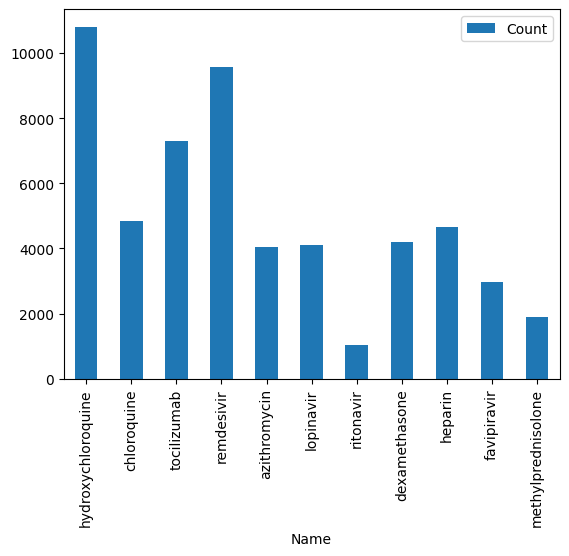

In [144]:
dfm.set_index('Name').plot.bar()

Теперь попробуем проследить за динамикой упоминания по месяцам. Для этого добавим столбец `publish_time` к таблице упоминаний:

In [145]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm

,hydroxychloroquine,chloroquine,tocilizumab,remdesivir,azithromycin,lopinavir,ritonavir,dexamethasone,heparin,favipiravir,methylprednisolone
publish_time,,,,,,,,,,,
2019-01-03,0,0,0,0,0,0,0,0,0,0,0
2019-01-02,0,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0,0,0,0,0,0,0,0
2019-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,0,0,0,0,0,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,0
2020-07-02,0,0,0,0,0,0,0,0,0,0,0


Используем двойную группировку по году и месяцу:

In [146]:
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2019         1                             11           14            1   
             2                              0            0            1   
             3                              0            2            0   
             4                              0            0            0   
             5                              0            0            0   
             6                              0            0            0   
             7                              0            0            0   
             8                              0            0            0   
             9                              0            0            0   
             10                             0            0            0   
             11                             0            1            0   
             12                             0            2            1   
2020         1                           3958         2008         1928   
             2                              0           19            0   
             3                             47           74            5   
             4                            192          242           51   
             5                            457          193          160   
             6                            387          154          245   
             7                            384          179          205   
             8                            316          119          176   
             9                            322          128          190   
             10                           318           99          211   
             11                           271           68          171   
             12                           259          108          228   
2021         1                           2505          904         2180   
             2                            166           69          184   
             3                            178           88          192   
             4                            203           73          130   
             5                            154           56          141   
             6                            145           30          146   
             7                            116           47           98   
             8                             84           47          127   
             9                             95           23          109   
             10                            66           25          144   
             11                           104           43          123   
             12                            69           19          163   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2019         1                      4             9          0          0   
             2                      0             1          0          0   
             3                      0             0          0          0   
             4                     10             1          0          0   
             5                      0             0          0          0   
             6                      1             0          2          0   
             7                      0             0          0          0   
             8                      3             7          0          0   
             9                      0             0          0          0   
             10                     0             1          0          0   
             11                     0             3          0          0   
             12                     1             0          1          0   
2020         1                   2317          1239       1552        403   
             2       

Построим это в виде графика:

<Axes: xlabel='publish_time,publish_time'>

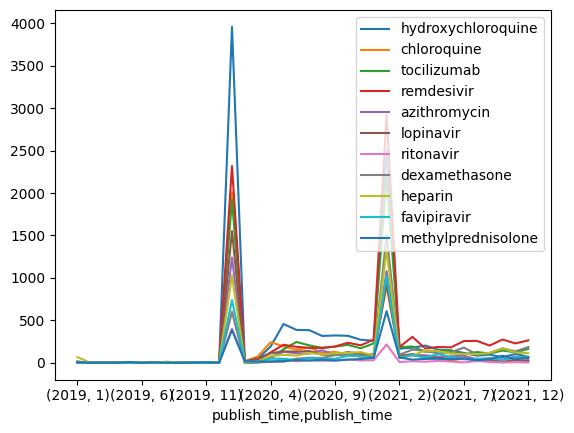

In [147]:
dfmt.plot()

Чтобы убрать январские всплески, присвоим соответствующим ячейкам значения `nan` (Not a Number), а затем с помощью функции `fillna` заполним из средними значениями.

<Axes: xlabel='publish_time,publish_time'>

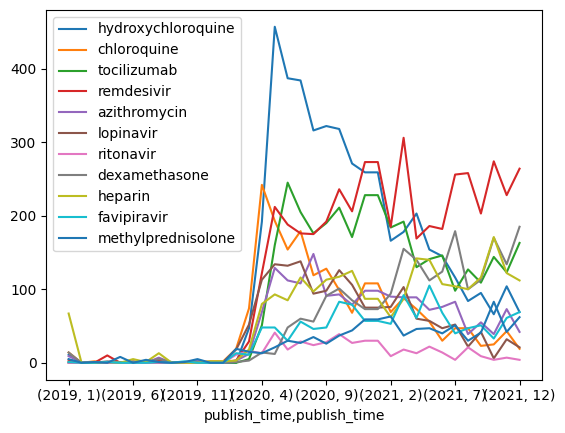

In [148]:
import numpy as np

dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)

dfmt.plot()

Можем также построить графики отдельно по самым известным лекарствам:

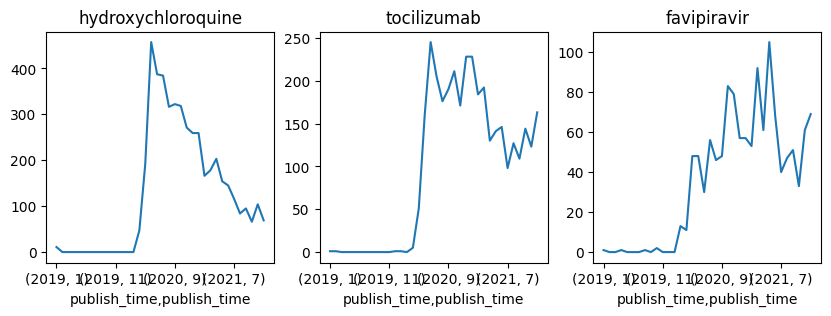

In [149]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']

fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

Еще один интересный способ визуализации - это **area plot**:

<Axes: xlabel='publish_time,publish_time'>

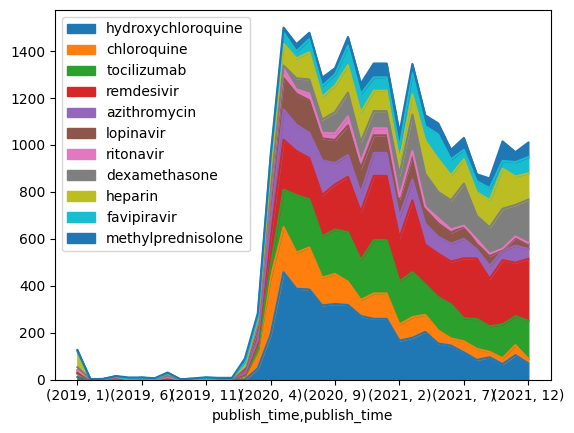

In [150]:
dfmt.plot.area()

Можем нормировать распределение в каждый из месяцов, чтобы отображать процентную долю лекарства среди всех упоминаний. Для этого с помощью `apply` пройдёмся по всем строкам и разделим каждое значение в строке на сумму этих значений:

<Axes: xlabel='publish_time,publish_time'>

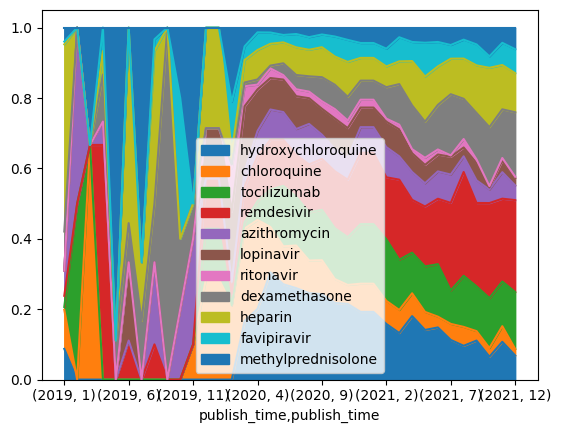

In [151]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()

В заключение посмотрим на сравнительное упоминание лекарств и диагнозов. Используем уже знакомый нам приём с заполнением матрицы numpy:

In [152]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in ' '+x:
            for j,me in enumerate(medications):
                if ' '+me in ' '+x:
                    m[j,i] += 1

In [153]:
m

array([[5309., 2513.,  802., 2308.,  374., 3060., 1044.],
       [2348., 1359.,  255., 1010.,   87., 1547.,  385.],
       [2556.,  959.,  785., 1239.,  218., 1303.,  649.],
       [3881., 2604.,  648., 1864.,  215., 2565.,  742.],
       [2056.,  894.,  447., 1000.,  165., 1030.,  460.],
       [2164., 1194.,  410.,  935.,  116., 1496.,  386.],
       [ 546.,  391.,   87.,  278.,   23.,  398.,  110.],
       [1879.,  820.,  451.,  950.,  154.,  947.,  394.],
       [1848.,  823.,  387.,  902.,  117.,  966.,  321.],
       [1143.,  722.,  234.,  504.,   48.,  761.,  154.],
       [ 873.,  390.,  341.,  477.,   83.,  538.,  177.]])

Построим график в виде heatmap. Для этого используем тот же приём, что и в прошлой лекции:

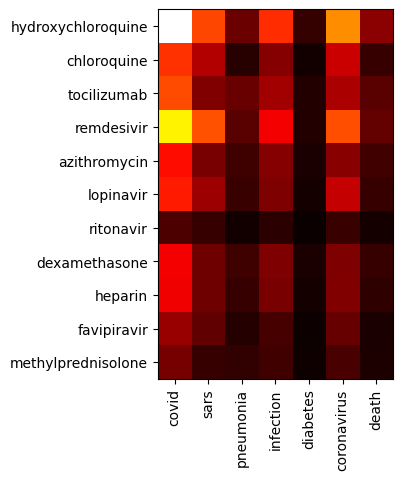

In [154]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications)))
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Ещё один интересный способ визуализации связи между двумя наборами понятий - это **sankey**-диаграмма. Для построения такой диаграммы хорошо подходит библиотека Plotly. [Вот тут](https://plotly.com/python/sankey-diagram/) есть пример кода с подробным описанием. ChatGPT тоже хорошо умеет строить такие диаграммы:

In [155]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()


sankey(medications,diagnosis,m,500,h2=[0])

## Задание

В качестве задания, выберите датасет на интересующую вас тему, и постройте инфографику, визуализирующую важные аспекты и взаимосвязи данных из этого датасета.

Постарайтесь, чтобы:

* Датасет был интересным
* Вам пришлось делать какую-то обработку данных, а не только сразу визуализацию
* Попробуйте добавить в визуализацию какую-то **изюминку** - вдохновляйтесь примерами на сайтах

Источники данных:

* [Kaggle](http://Kaggle.com) – сайт соревований для датасайнтистов. Там же можно искать код
* Открытые данные:
  - ищите в интернете по этим ключевым словам
  - https://data.world/datasets/open-data
* [Список от Yandex](https://yandex.ru/project/oda/useful)
* Статьи:
  - [15 of the Best Free Open Data Sources for 2024](https://careerfoundry.com/en/blog/data-analytics/open-data-sources/)

